<a href="https://colab.research.google.com/github/BoaventuraGui/teste2/blob/main/samTentativa5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install segment-geospatial leafmap localtileserver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 207.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from samgeo.text_sam import LangSAM
import os
os.kill(os.getpid(), 9)

Installing GroundingDINO...
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 1.5 MB/s eta 0:00:00
Preparing metadata (setup.py): started
Preparing metadata (setup.py): finished with status 'done'
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 39.9 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 23.8 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.2 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.6 MB/s eta 0:00:00
Created wheel for groundingdino-py: filename=groundingdino_py-0.4.0-py2.py3-none-any.whl size=88739 sha256=6f11ab216f2e7120ce354426b819ab4dcc32874d6131821ad441c7177fc7fca3
Stored in directory: /root/.cache/pip/wheels/72/25/30/97b491abad279d329c62bef1e91bc56bf2fd40b22281068e1d
Successfully built groundingdino-py
Attempting uninstall: importlib-metadata
Found existing installation: importlib-metadata 4.6.4
Uninstalling import

In [ ]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps
from samgeo.text_sam import LangSAM
import torch

In [ ]:
m = leafmap.Map(center=[-20.4597, -54.6201], zoom=19)
m.add_basemap("SATELLITE")
m

Map(center=[-20.4597, -54.6201], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [ ]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    #bbox = [-95.3704, 29.6762, -95.368, 29.6775]
    bbox = [-54.6500, -20.4600, -54.6530, -20.4630]
    #bbox = [-54.628, -20.480, -54.611, -20.460]#Sequência invertida do QGIS: QGIS(X,Y) => BBOX(Y,X)
#bbox = [-54.6200, -20.4580, -54.61804, -20.4640]
print('BBOX:', bbox)

BBOX: [-54.65, -20.46, -54.653, -20.463]


In [ ]:
image = "satellite.tif"
#get_basemaps().keys()
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source="Satellite", overwrite=True)

Downloaded image 001/100
Downloaded image 002/100
Downloaded image 003/100
Downloaded image 004/100
Downloaded image 005/100
Downloaded image 006/100
Downloaded image 007/100
Downloaded image 008/100
Downloaded image 009/100
Downloaded image 010/100
Downloaded image 011/100
Downloaded image 012/100
Downloaded image 013/100
Downloaded image 014/100
Downloaded image 015/100
Downloaded image 016/100
Downloaded image 017/100
Downloaded image 018/100
Downloaded image 019/100
Downloaded image 020/100
Downloaded image 021/100
Downloaded image 022/100
Downloaded image 023/100
Downloaded image 024/100
Downloaded image 025/100
Downloaded image 026/100
Downloaded image 027/100
Downloaded image 028/100
Downloaded image 029/100
Downloaded image 030/100
Downloaded image 031/100
Downloaded image 032/100
Downloaded image 033/100
Downloaded image 034/100
Downloaded image 035/100
Downloaded image 036/100
Downloaded image 037/100
Downloaded image 038/100
Downloaded image 039/100
Downloaded image 040/100


In [ ]:
image = 'satellite.tif'
m.layers[-1].visible = False  # turn off the basemap
m.add_raster(image, layer_name="Image")
m

INFO:large_image:Cannot use memcached for caching.
INFO:large_image:Using python for large_image caching


Map(bottom=74904570.0, center=[-20.4597, -54.6201], controls=(ZoomControl(options=['position', 'zoom_in_text',…

final text_encoder_type: bert-base-uncased


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:29<00:00, 88.3MB/s]


Map(bottom=37452793.0, center=[-20.461500000000015, -54.6515], controls=(ZoomControl(options=['position', 'zoo…

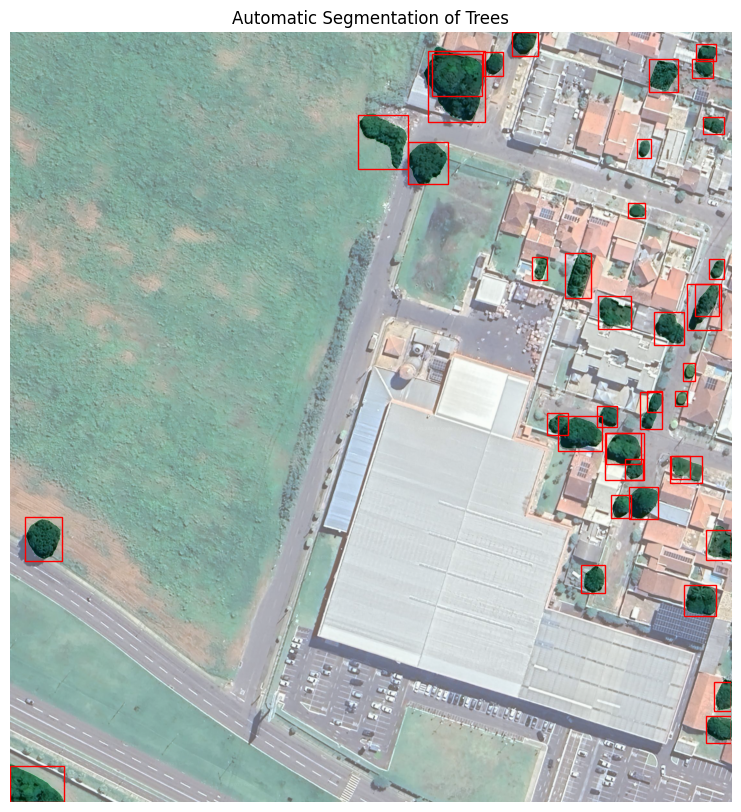

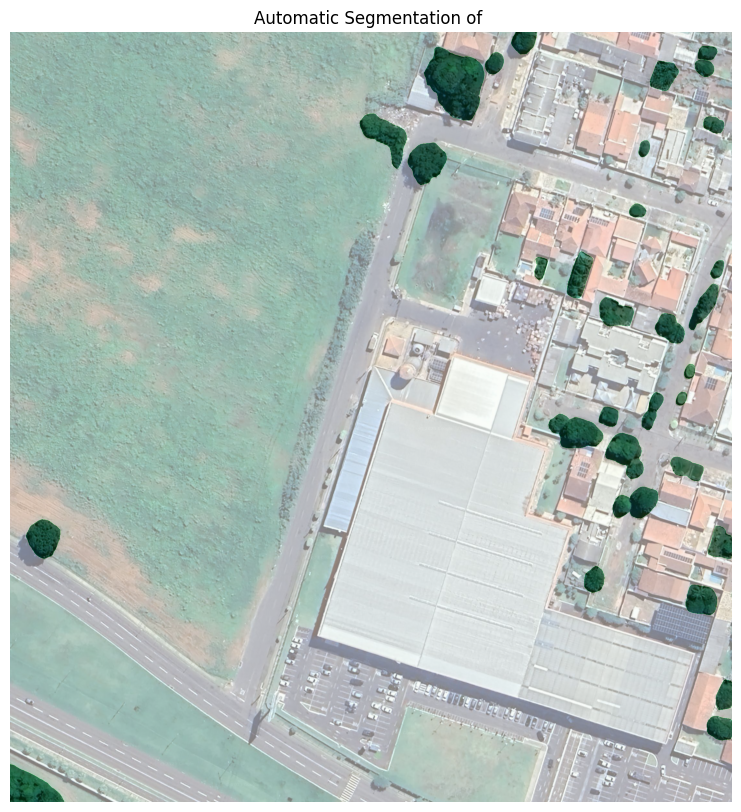

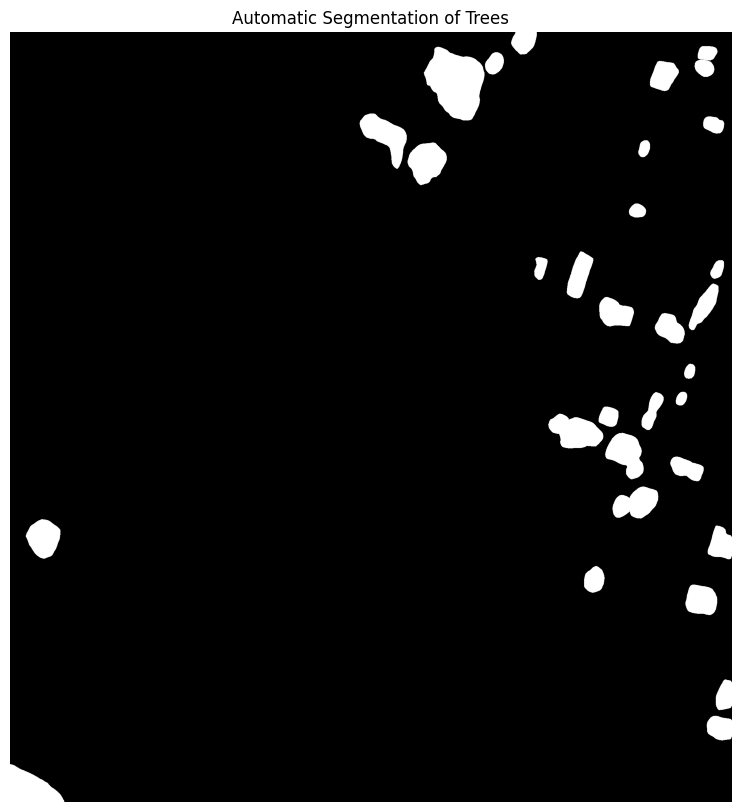

In [ ]:
sam = LangSAM()
text_prompt = "tree" #"tree" ou "building" or "swimming pool"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
sam.predict(image, text_prompt, device=device, box_threshold=0.24, text_threshold=0.24)
sam.show_anns(
    cmap='Greens',
    box_color='red',
    title='Automatic Segmentation of Trees',
    blend=True,
)
sam.show_anns(
    cmap='Greens',
    add_boxes=False,
    alpha=0.5,
    title='Automatic Segmentation of ',
)
sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Automatic Segmentation of Trees',
    blend=False,
    output='trees.tif',
)
sam.raster_to_vector("trees.tif", "trees.shp")
m.add_raster("trees.tif", layer_name="Trees", palette="Greens", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("trees.shp", layer_name="Vector", style=style)
m